In [50]:
import pandas as pd
import numpy as np
import ipywidgets
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [3]:
df = pd.read_csv('books.csv',error_bad_lines=False)

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In [4]:
df.shape

(11123, 12)

In [5]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [19]:
#df.select_dtypes(exclude=['number'])

In [18]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [17]:
df.columns = df.columns.str.strip()

In [20]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [22]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [23]:
df.describe(include='object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [27]:
#df.loc[1:3,'bookID':'authors']

In [28]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [29]:
df.duplicated().any()

False

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Feture Engineering

* Extract Important Features
* Reducing the size of features
* Creating fetaures from the exisdting ones

In [33]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [34]:
df.isbn.nunique()

11123

In [35]:
df.isbn13.nunique()

11123

In [36]:
df.drop(['bookID','isbn','isbn13'],axis=1,inplace=True)

In [37]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [38]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [41]:
df['year'] = df['publication_date'].str.split('/')

df['year'] = df['year'].apply(lambda x:x[2])

In [43]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [46]:
df['year'] = df['year'].astype('int32')

In [47]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [48]:
df['year'].min()

1900

In [49]:
df['year'].max()

2020

Exploratory Data Analysis

In [66]:
df[df['year']==2019][['title','authors','average_rating','language_code']]

,title,authors,average_rating,language_code
390,Enthusiasm and Divine Madness,Josef Pieper/Richard Winston/Clara Winston,4.50,eng
1070,The Wish Giver: Three Tales of Coven Tree,Bill Brittain/Andrew Glass,3.83,eng
3981,The Art of Loving,Erich Fromm/Peter D. Kramer/Rainer Funk,4.04,eng
10335,American Genesis: Captain John Smith and the F...,Alden T. Vaughan,3.43,eng
10769,Object Thinking,David West,3.99,eng
10823,Monster,Walter Dean Myers,3.72,eng


In [69]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

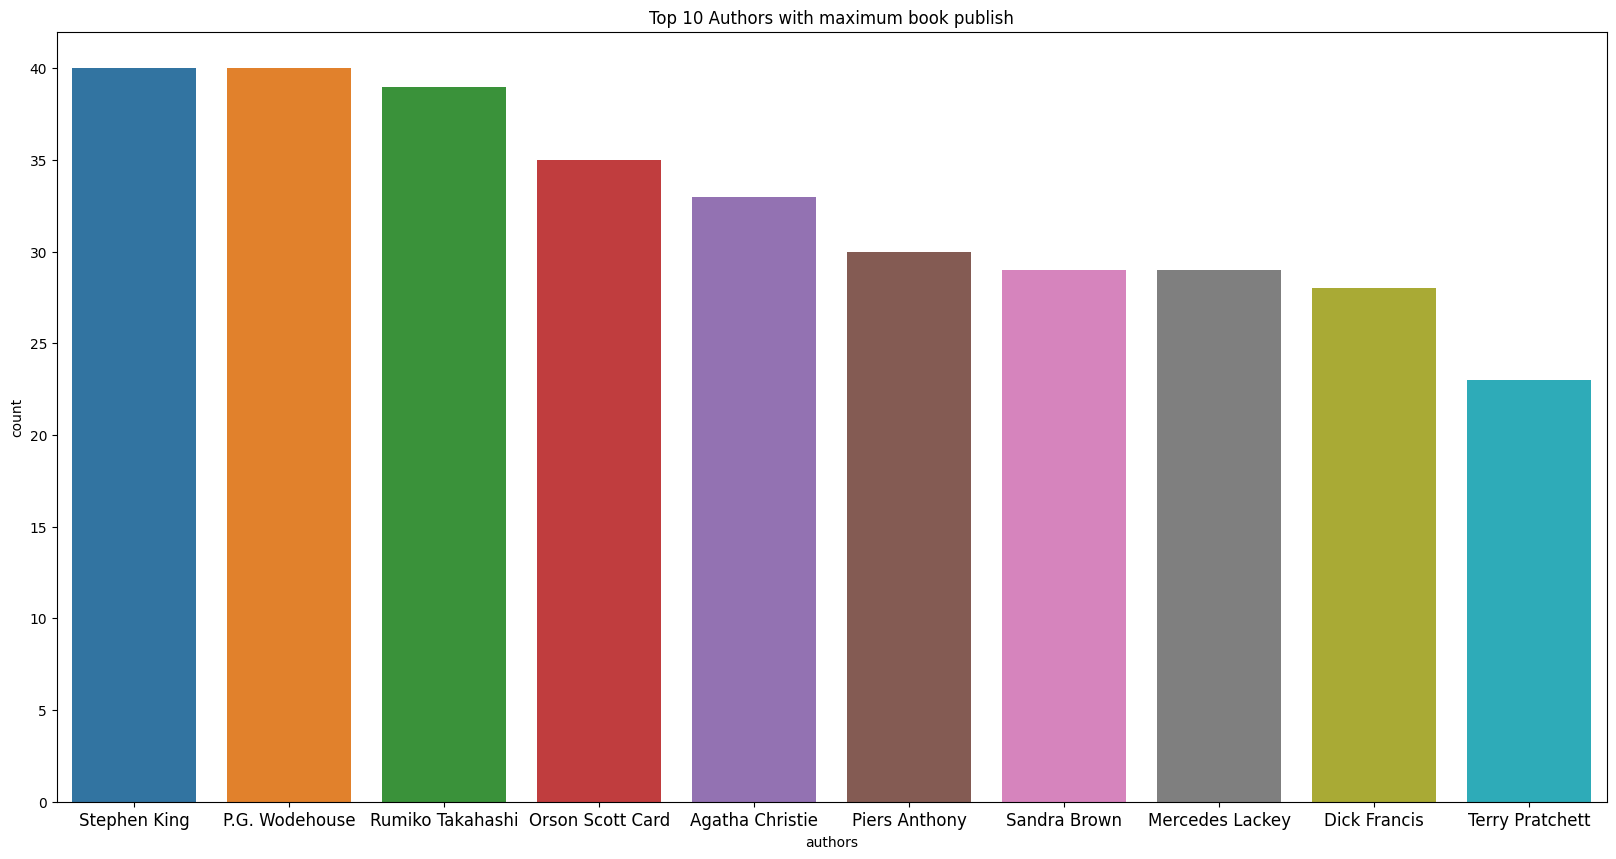

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'authors', data=df, order = df['authors'].value_counts().iloc[:10].index)
plt.title('Top 10 Authors with maximum book publish')
plt.xticks(fontsize = 12)
plt.show()

In [73]:
df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [79]:
df.groupby(['language_code'])[['average_rating','ratings_count','text_reviews_count']].agg('mean').style.background_gradient(cmap='Wistia')

,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


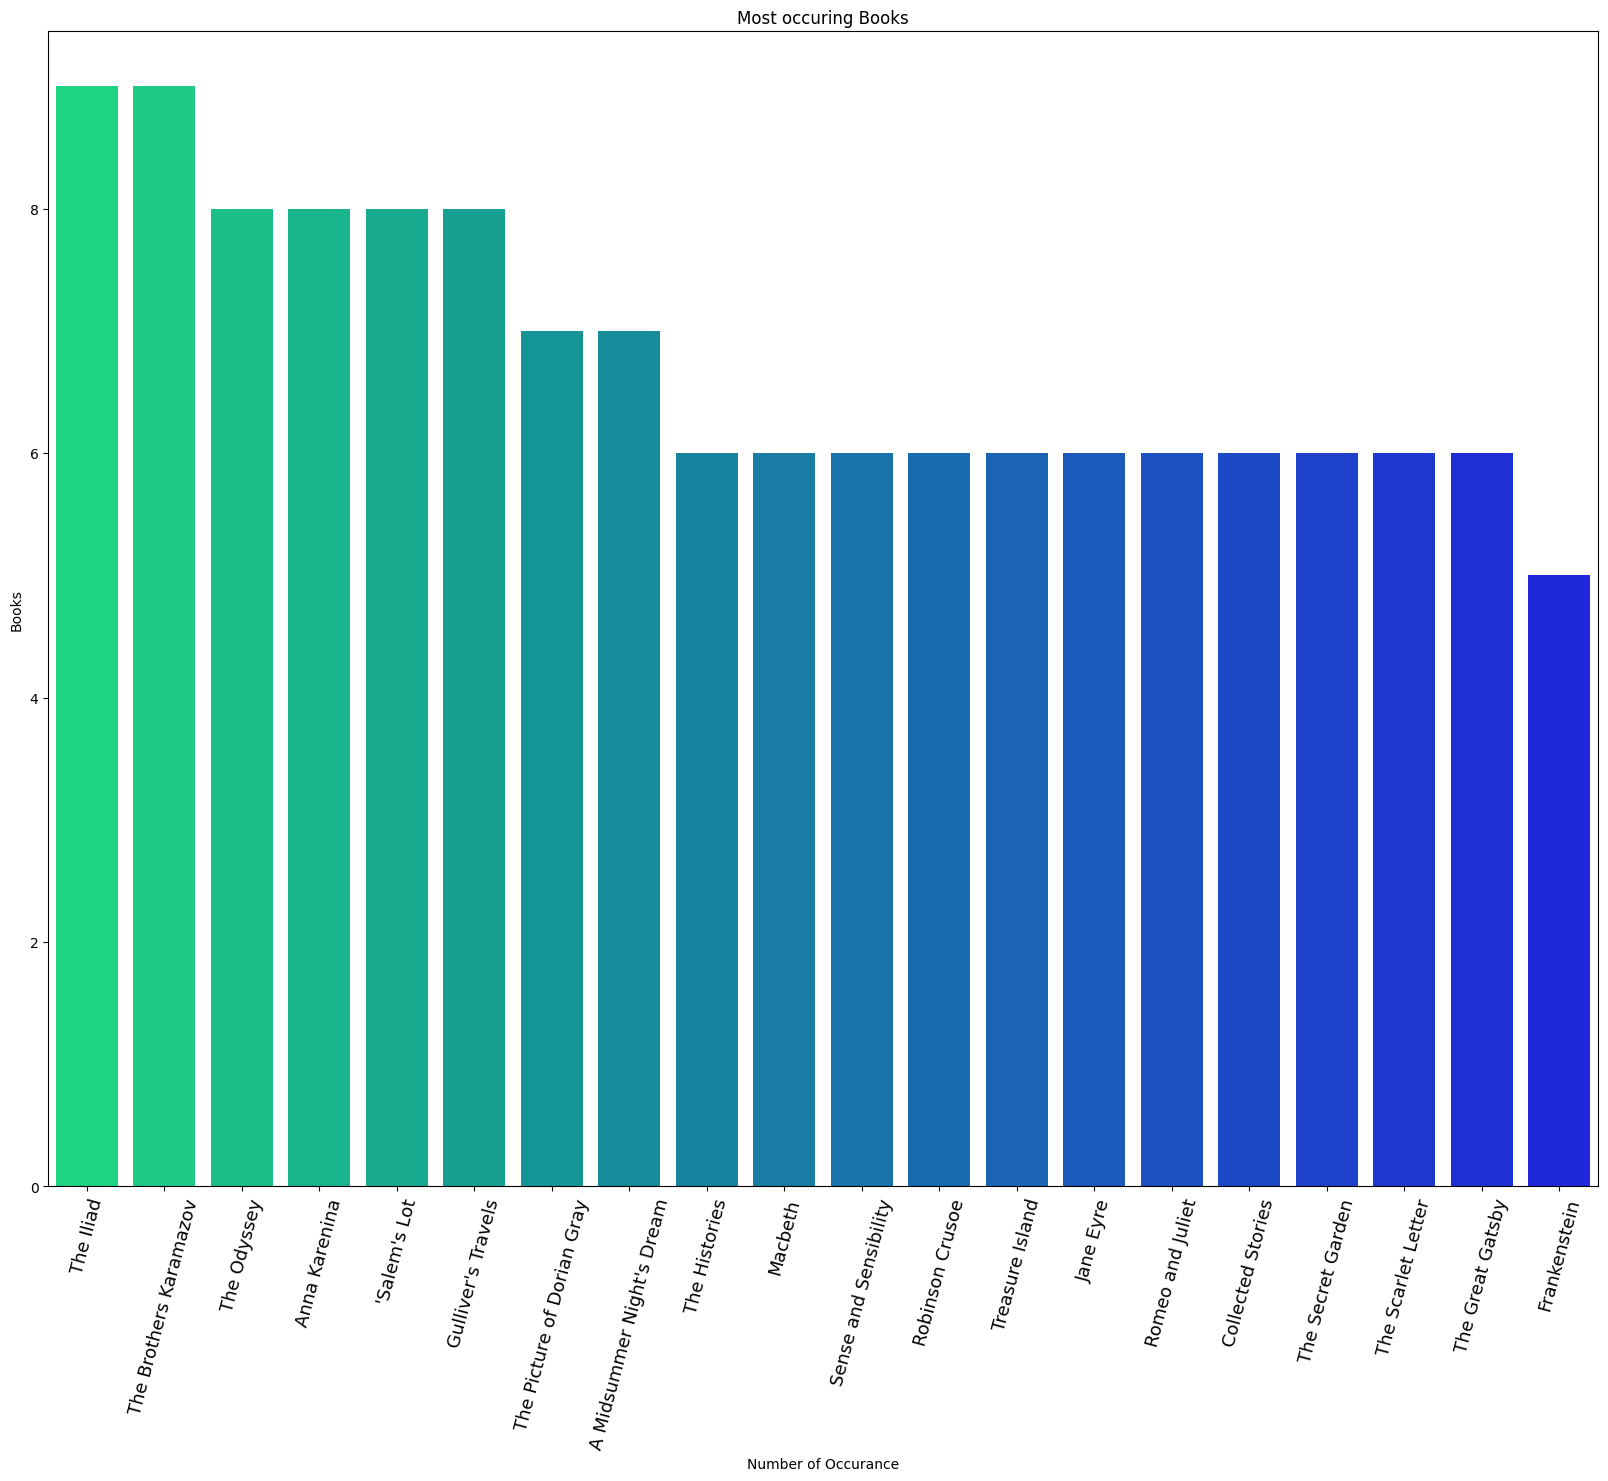

In [86]:
# to find most occuring book in our data
plt.figure(figsize=(20,15))
book  = df['title'].value_counts()[:20]
sns.barplot(x = book.index,y = book, palette='winter_r')
plt.title('Most occuring Books')
plt.xlabel('Number of Occurance')
plt.ylabel('Books')
plt.xticks(rotation=75, fontsize = 13)
plt.show()